# Visualise MSA details

## All the dead patients

Rows: 3084 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): tube_code
dbl (4): PATIENT_ID, death_7_day, death_14_day, death_30_day



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


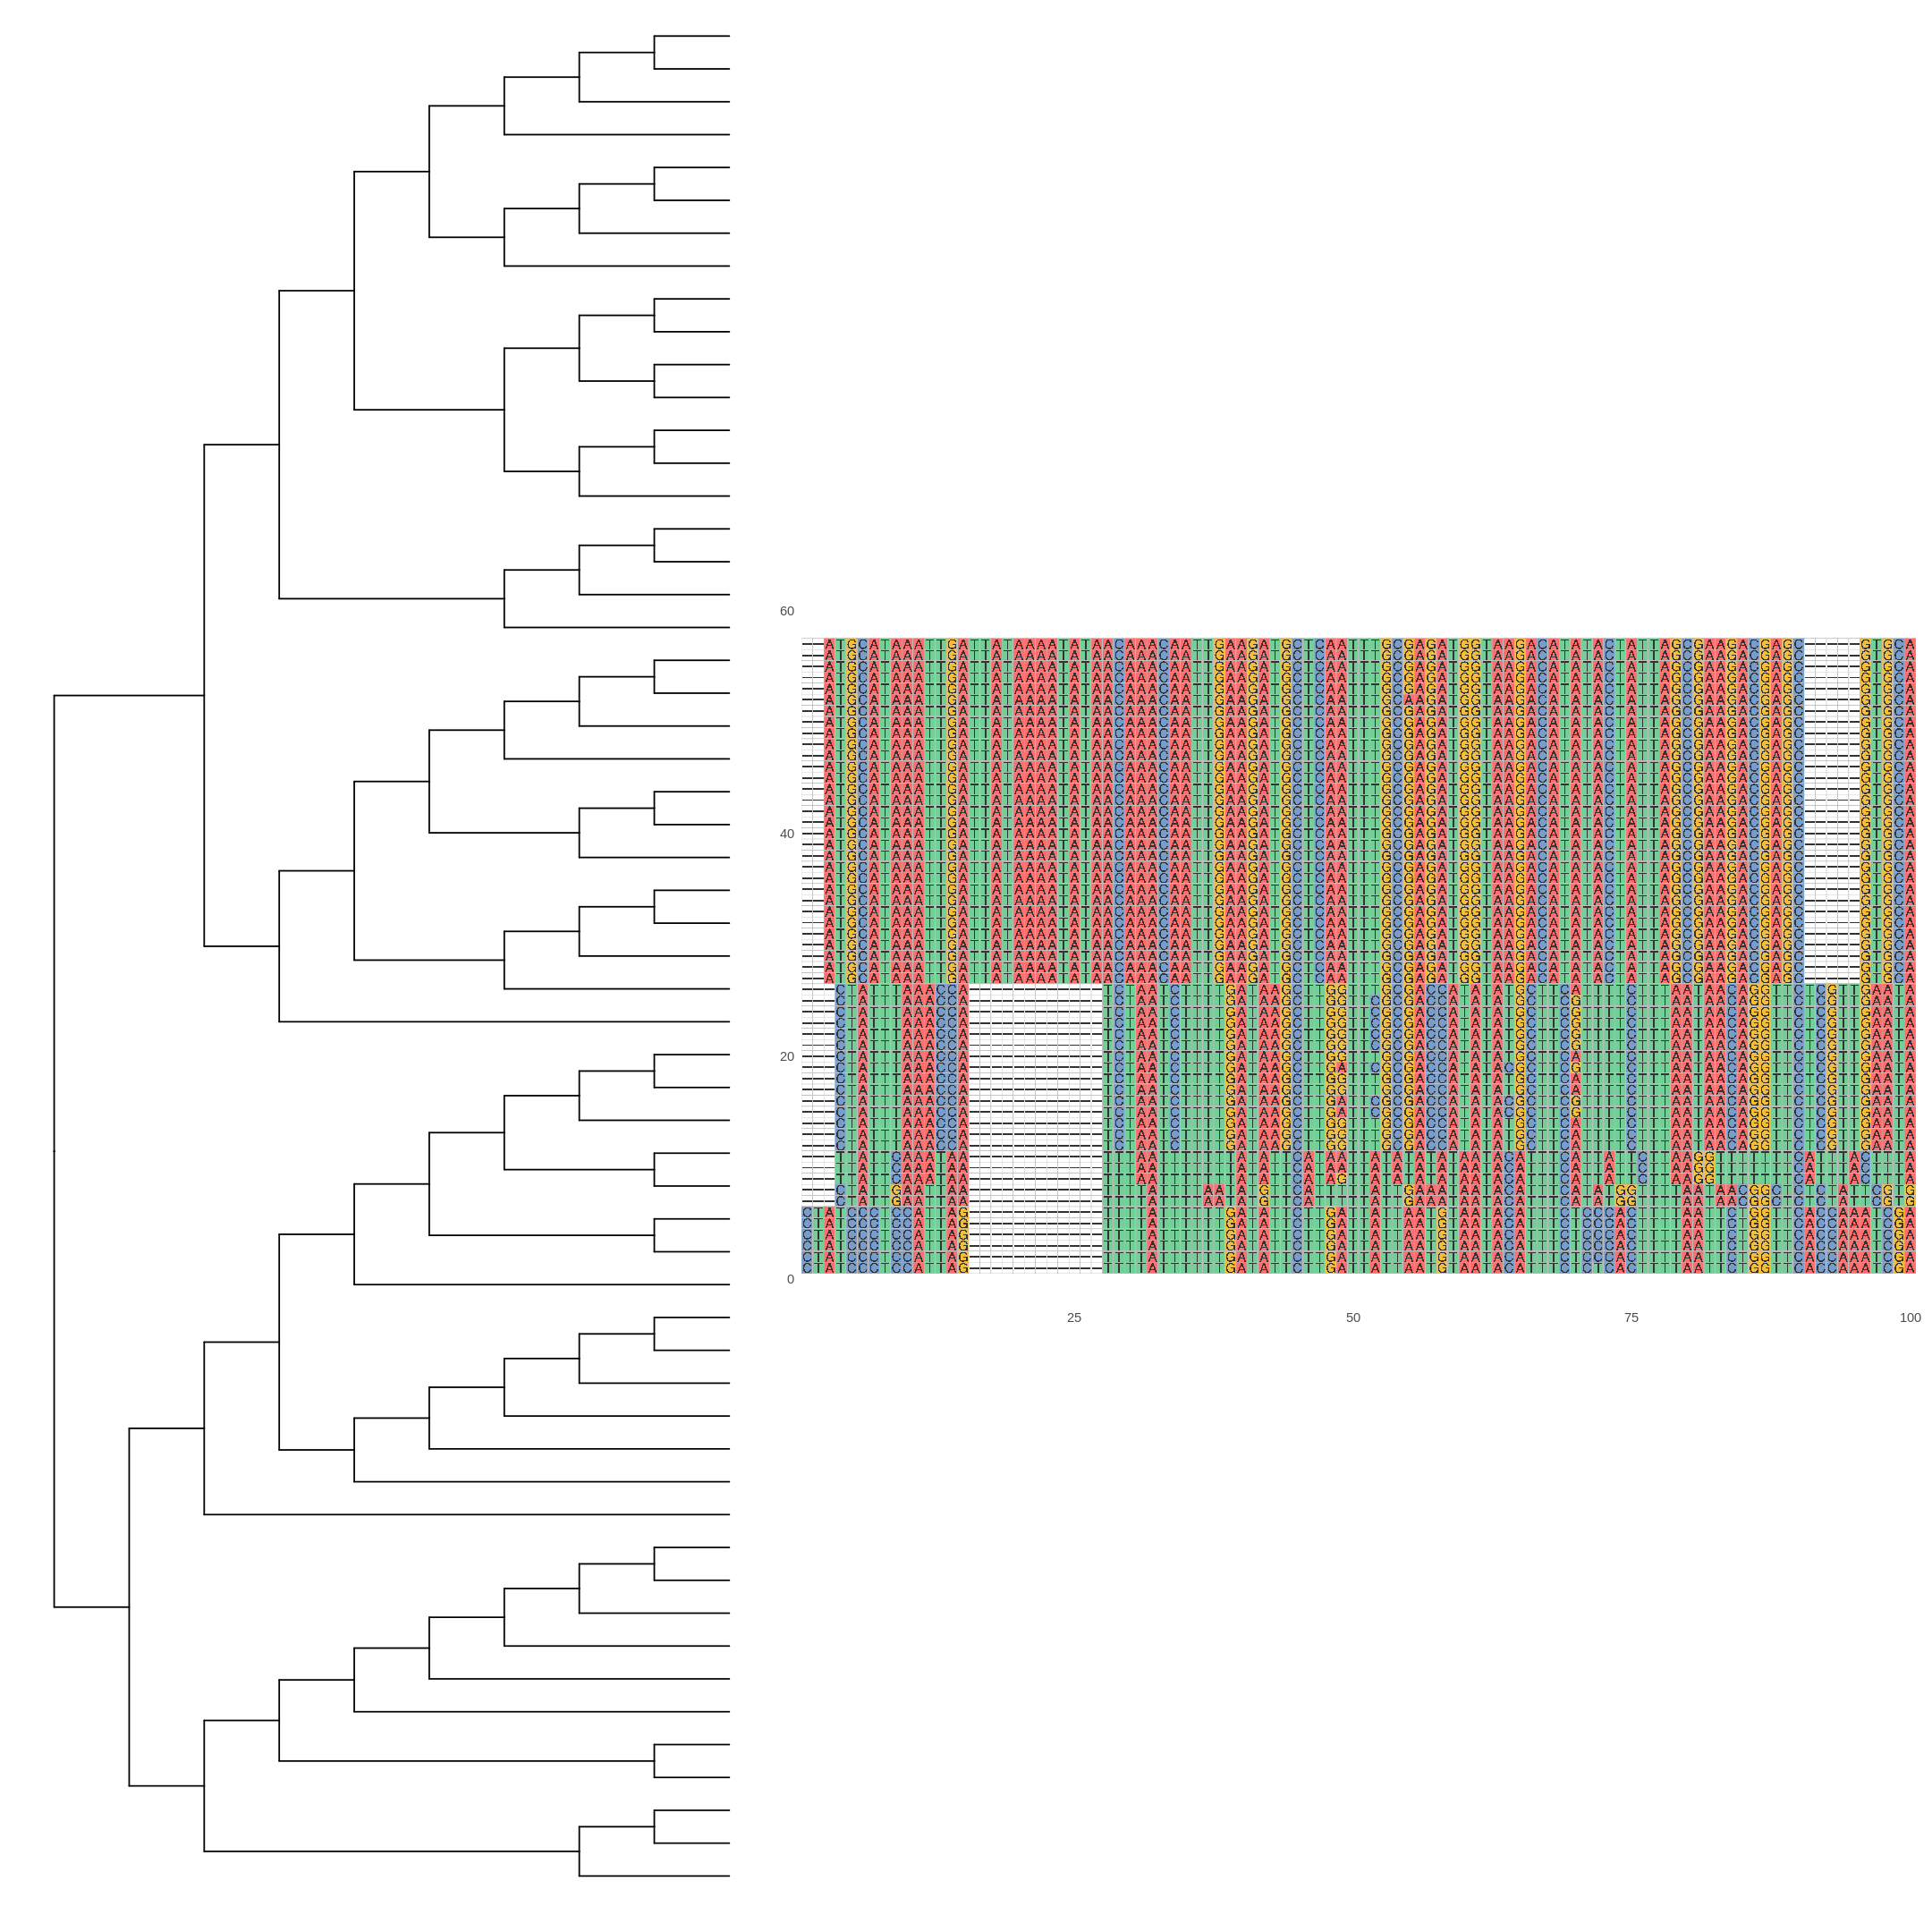

In [34]:
options(repr.plot.width = 18, repr.plot.height = 18)

library(ape)
library(ggtree)
library(ggplot2)
library(dplyr)
library(readr)
library(tidyr)
library(ggmsa)
library(Biostrings)
library(patchwork)


tree <- read.tree(
  "~/workspace/genome_data/annotations/s_aureus/gene_sequences/essC_tree.nwk"
)

mortality_df <- read_csv(
  "~/workspace/ehr_data/data/full_cohort/tube_id_mortality_labels.csv"
)

filtered_mortality_df <- (mortality_df %>% filter(death_30_day == 0))

filtered_tree <- drop.tip(
  tree,
  (filtered_mortality_df %>% pull(tube_code)),
)

tip_order <- filtered_tree$tip.label

aligned <- readDNAMultipleAlignment(
  filepath = "~/workspace/genome_data/annotations/s_aureus/gene_sequences/essC_aligned.fna",
  format = "fasta"
)

aligned_seqs <- DNAStringSet(aligned)
aligned_ordered <- aligned_seqs[match(tip_order, names(aligned_seqs))]
aligned_ordered_msa <- DNAMultipleAlignment(aligned_ordered)

tree_plot <- ggtree(filtered_tree, branch.length = "none")

msa_plot <- ggmsa(
  aligned_ordered_msa,
  start = 1,
  end = 100,
  color = "Chemistry_NT"
)

final_plot <- tree_plot + msa_plot +
  plot_layout(ncol = 2, widths = c(2, 3), guides = "collect")

final_plot

### Generate plots

In [1]:
options(repr.plot.width = 24, repr.plot.height = 16)

library(ape)
library(ggtree)
library(ggplot2)
library(dplyr)
library(readr)
library(tidyr)
library(ggmsa)
library(Biostrings)
library(patchwork)


tree <- read.tree(
  "~/workspace/genome_data/annotations/s_aureus/gene_sequences/essC_tree_min.nwk"
)

mortality_df <- read_csv(
  "~/workspace/ehr_data/data/full_cohort/tube_id_mortality_labels.csv"
)

filtered_mortality_df <- (mortality_df %>% filter(death_30_day == 0))

filtered_tree <- drop.tip(
  tree,
  (filtered_mortality_df %>% pull(tube_code)),
)

tip_order <- filtered_tree$tip.label

aligned <- readDNAMultipleAlignment(
  filepath = "~/workspace/genome_data/annotations/s_aureus/gene_sequences/essC_aligned.fna",
  format = "fasta"
)

aligned_seqs <- DNAStringSet(aligned)
aligned_ordered <- aligned_seqs[match(tip_order, names(aligned_seqs))]
aligned_ordered_matrix <- as.matrix(aligned_ordered)

conservation <- apply(aligned_ordered_matrix, 2, function(col) {
  max(table(col)) / length(col)
})

# Create data frame
conservation_df <- data.frame(
  position = 1:length(conservation),
  conservation = conservation
)

conservation_df <- conservation_df %>%
  mutate(variability = 1 - conservation)

aligned_ordered_msa <- DNAMultipleAlignment(aligned_ordered)

ggtree v3.16.0 Learn more at https://yulab-smu.top/contribution-tree-data/

Please cite:

Guangchuang Yu.  Data Integration, Manipulation and Visualization of
Phylogenetic Trees (1st edition). Chapman and Hall/CRC. 2022,
doi:10.1201/9781003279242, ISBN: 9781032233574


Attaching package: ‘ggtree’


The following object is masked from ‘package:ape’:

    rotate



Attaching package: ‘dplyr’


The following object is masked from ‘package:ape’:

    where


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘tidyr’


The following object is masked from ‘package:ggtree’:

    expand


Registered S3 methods overwritten by 'ggalt':
  method                  from   
  grid.draw.absoluteGrob  ggplot2
  grobHeight.absoluteGrob ggplot2
  grobWidth.absoluteGrob  ggplot2
  grobX.absoluteGrob      ggplot2
  grobY.absoluteGrob      ggplot2

ggmsa v1.14.0  Docume

In [2]:
library(pbapply)
pboptions(type = "timer")

data <- read.csv(
  "~/workspace/ehr_data/data/full_cohort/saur_high_score_tokens.csv",
  header = FALSE
)
all_coordinates <- pbapply(data, 1, function(row) {
  # process each row (as a vector)
  motif <- row[[1]]

  matches <- lapply(aligned_ordered, function(seq) {
    pos <- gregexpr(motif, seq)[[1]]
    if (pos[1] != -1) unique(pos) else NA
  })
  all_positions <- unlist(matches)
  unique_positions <- unique(
    all_positions[!is.na(all_positions)]
  )
  lapply(unique_positions, function(pos) {
    c(pos, pos + nchar(motif), motif)
  })

})

  |                                                  | 0 % ~calculating  

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=08s  


In [7]:
library(patchwork)


for (i in seq(from = 1, to = 4700, by = 400)) {

  print("---------------------------------------------")
  print(paste0("-------------", i, "-------------------------"))
  print("---------------------------------------------")
  start <- i
  end <- (i - 1) + 400

  msa_plot <- 'msa_plot <- ggmsa(
    aligned_ordered_msa,
    start = %d,
    end = %d,
    color = "Chemistry_NT"
  )'

  rect_annotation <- 'annotate(
  "rect",
  xmin = %s,
  xmax = %s,
  ymin = -Inf,
  ymax = Inf,
  alpha = 0.1,
  fill = "red"
  )'

  text_annotation <- 'annotate(
    "text",
    x = %d,
    y = -1,
    label = "%s",
    color = "black",
    size = 3
  )'

  eval(parse(text = sprintf(msa_plot, start, end)))

  unpacked_coordinates <- do.call(c, all_coordinates)

  plot_coordinates <- Filter(function(coord) {
    ((as.integer(coord[1]) >= start) && (as.integer(coord[2]) <= end))
  }, unpacked_coordinates)

  for (coordinate in plot_coordinates) {
    rect_code <- sprintf(rect_annotation, coordinate[1], coordinate[2])
    msa_plot <- msa_plot + eval(parse(text = rect_code))

    text_x <- round((as.integer(coordinate[1]) + as.integer(coordinate[2])) / 2)
    text_code <- sprintf(text_annotation, text_x, coordinate[3])
    msa_plot <- msa_plot + eval(parse(text = text_code))
  }

  conservation_plot <- ggplot(
    conservation_df[start: end, ],
    aes(x = position, y = conservation)
  ) +
    geom_col() +
    coord_fixed(ratio = 13.2) +
    theme_minimal()

  final_plot <- msa_plot / conservation_plot + plot_layout(heights = c(2, 1))

  ggsave(
    paste0(
      "~/workspace/genome_data/annotations/s_aureus/msa_plots/essC/dead_30_days/msa_tokens_plot_",
      start,
      "_",
      end,
      ".png"
    ),
    plot = final_plot,
    dpi = 600,
    width = 24,
    height = 16,
    units = "in",
    create.dir = TRUE
  )
}

[1] "---------------------------------------------"
[1] "-------------1-------------------------"
[1] "---------------------------------------------"


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


[1] "---------------------------------------------"
[1] "-------------401-------------------------"
[1] "---------------------------------------------"


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


[1] "---------------------------------------------"
[1] "-------------801-------------------------"
[1] "---------------------------------------------"


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


[1] "---------------------------------------------"
[1] "-------------1201-------------------------"
[1] "---------------------------------------------"


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


[1] "---------------------------------------------"
[1] "-------------1601-------------------------"
[1] "---------------------------------------------"


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


[1] "---------------------------------------------"
[1] "-------------2001-------------------------"
[1] "---------------------------------------------"


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


[1] "---------------------------------------------"
[1] "-------------2401-------------------------"
[1] "---------------------------------------------"


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


[1] "---------------------------------------------"
[1] "-------------2801-------------------------"
[1] "---------------------------------------------"


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


[1] "---------------------------------------------"
[1] "-------------3201-------------------------"
[1] "---------------------------------------------"


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


[1] "---------------------------------------------"
[1] "-------------3601-------------------------"
[1] "---------------------------------------------"


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


[1] "---------------------------------------------"
[1] "-------------4001-------------------------"
[1] "---------------------------------------------"


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


[1] "---------------------------------------------"
[1] "-------------4401-------------------------"
[1] "---------------------------------------------"


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”
Warning message:
“Removed 36 rows containing missing values or values outside the scale range
(`geom_col()`).”


## Randomly selected alive patients

Rows: 3084 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): tube_code
dbl (4): PATIENT_ID, death_7_day, death_14_day, death_30_day

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


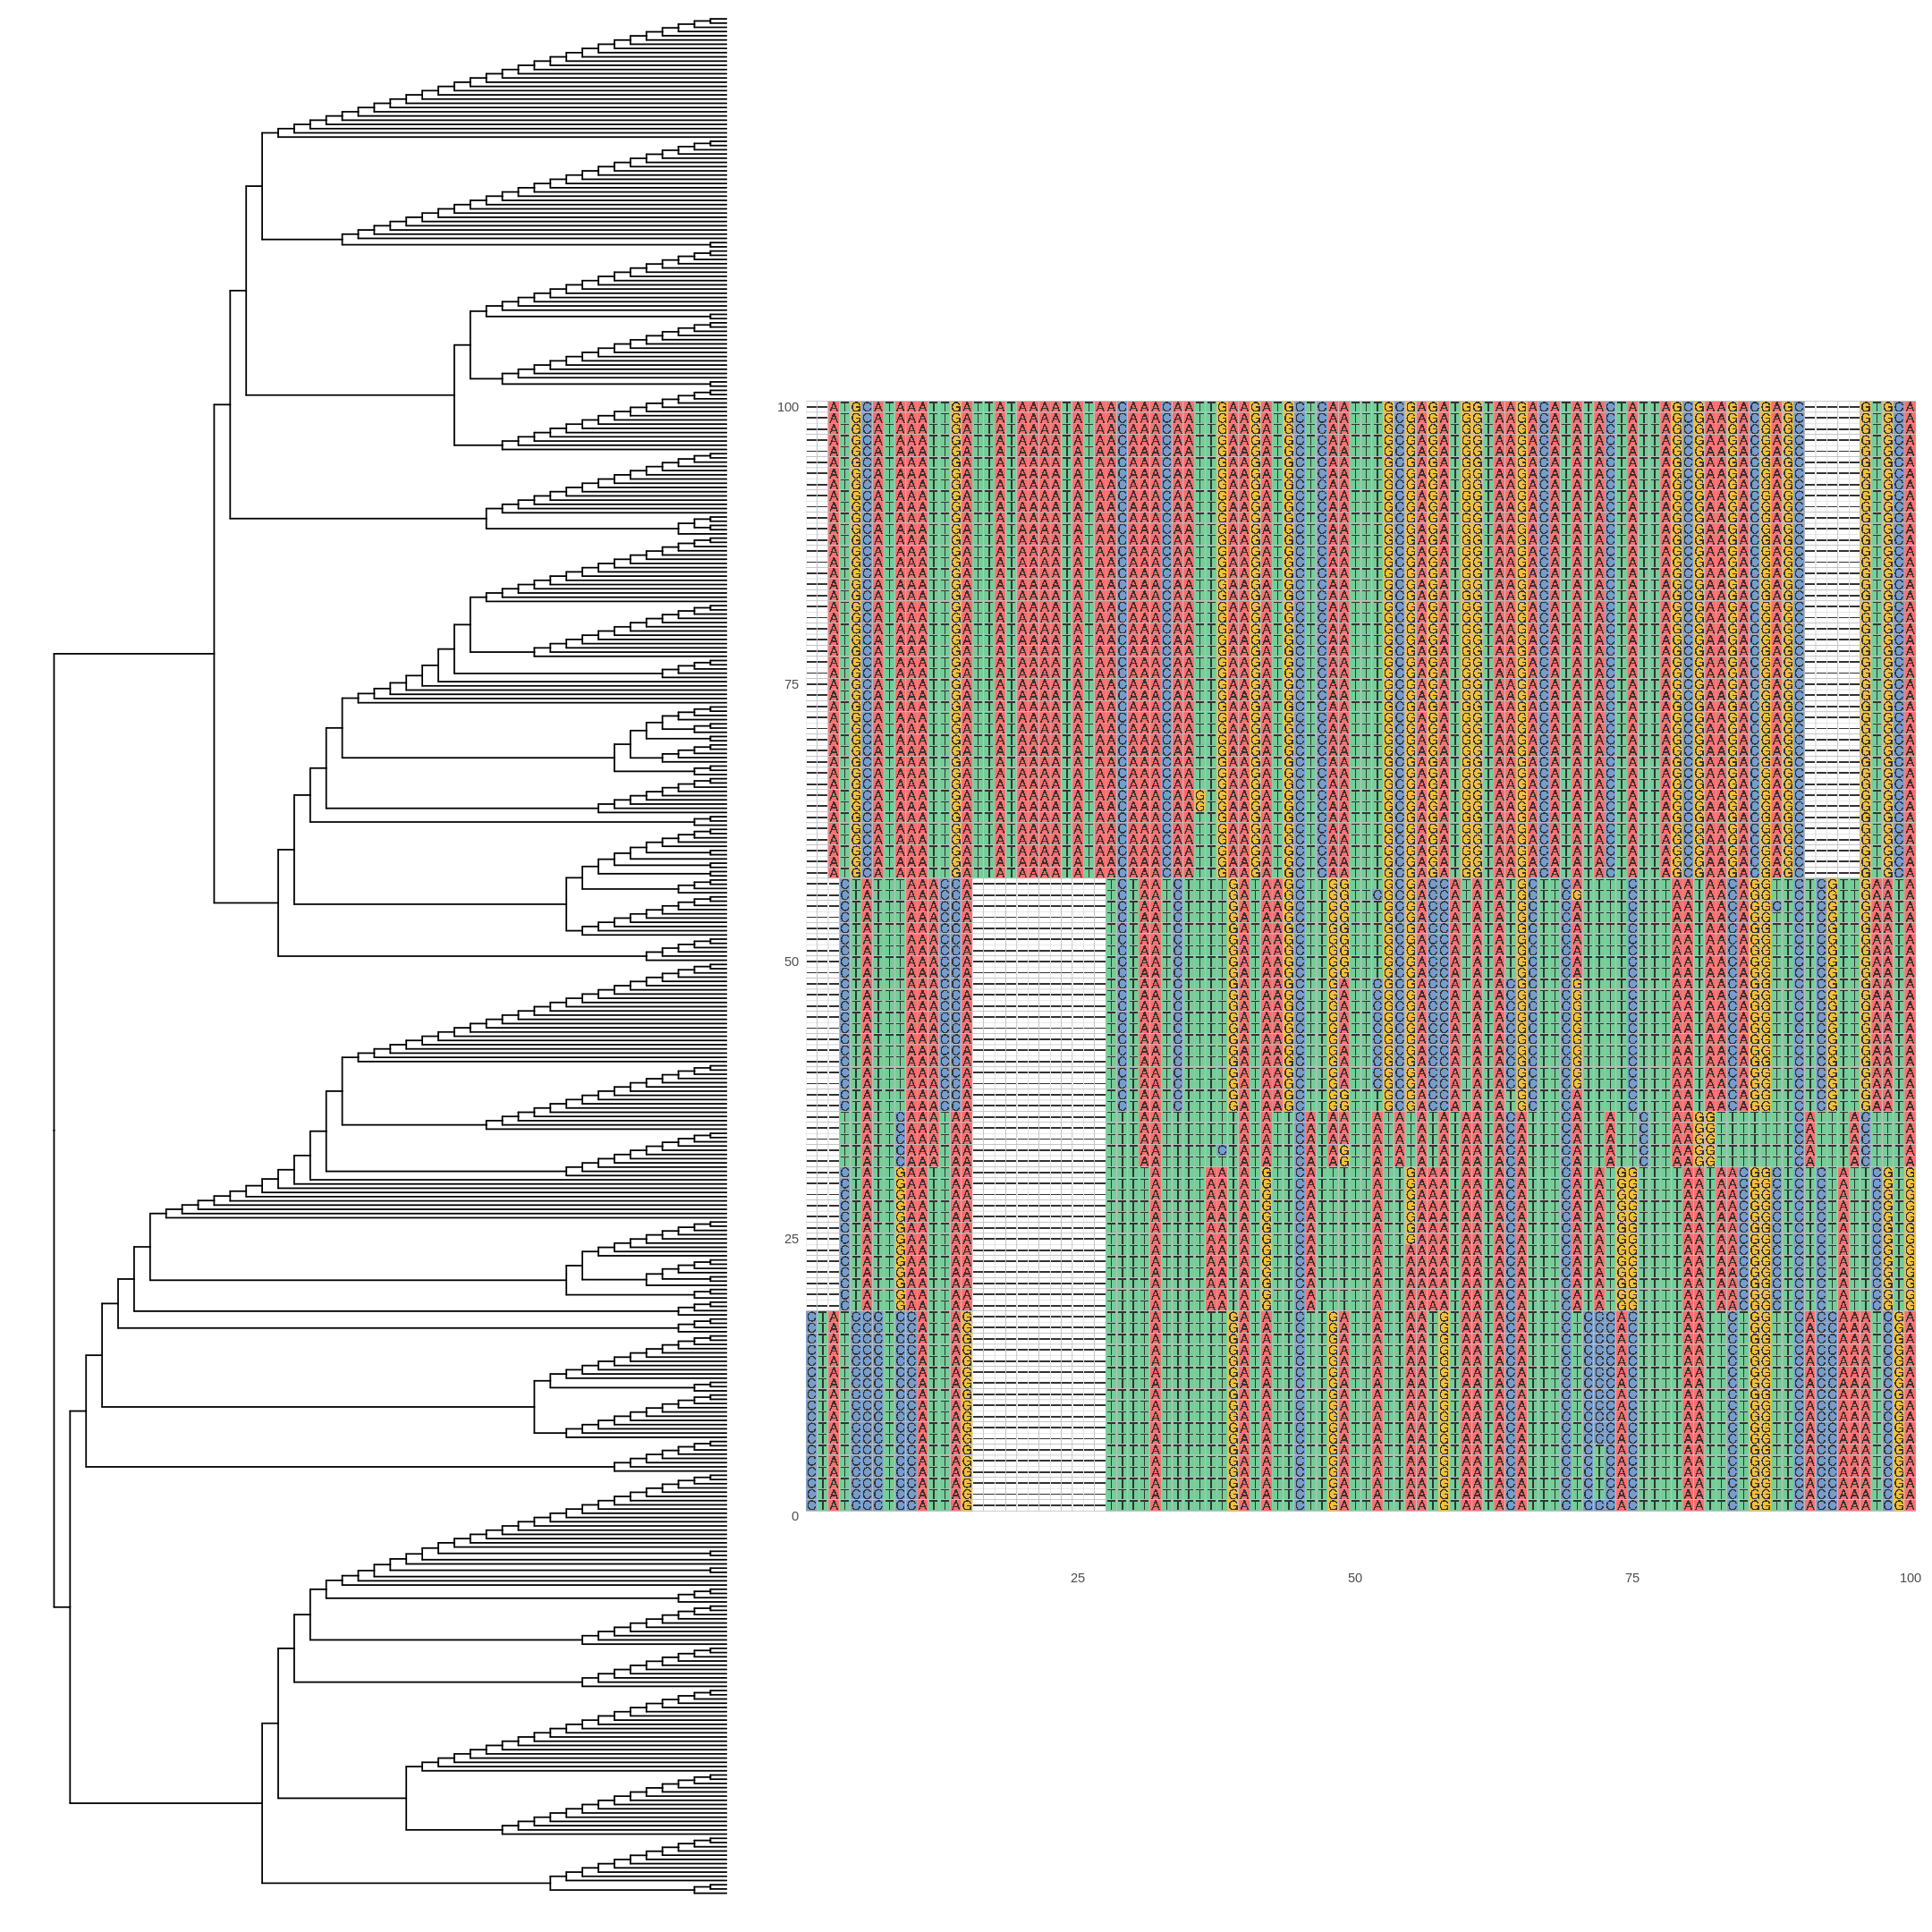

In [12]:
options(repr.plot.width = 18, repr.plot.height = 18)

library(ape)
library(ggtree)
library(ggplot2)
library(dplyr)
library(readr)
library(tidyr)
library(ggmsa)
library(Biostrings)
library(patchwork)


tree <- read.tree(
  "~/workspace/genome_data/annotations/s_aureus/gene_sequences/essC_tree.nwk"
)

mortality_df <- read_csv(
  "~/workspace/ehr_data/data/full_cohort/tube_id_mortality_labels.csv"
)

filtered_mortality_df <- (mortality_df %>% filter(death_30_day == 1))

filtered_tree <- drop.tip(
  tree,
  (filtered_mortality_df %>% pull(tube_code)),
)

set.seed(42)

random_tips <- sample(filtered_tree$tip.label, 100)

random_tree <- keep.tip(tree, random_tips)

tip_order <- random_tree$tip.label

aligned <- readDNAMultipleAlignment(
  filepath = "~/workspace/genome_data/annotations/s_aureus/gene_sequences/essC_aligned.fna",
  format = "fasta"
)

aligned_seqs <- DNAStringSet(aligned)
aligned_ordered <- aligned_seqs[match(tip_order, names(aligned_seqs))]
aligned_ordered_msa <- DNAMultipleAlignment(aligned_ordered)

tree_plot <- ggtree(filtered_tree, branch.length = "none")

msa_plot <- ggmsa(
  aligned_ordered_msa,
  start = 1,
  end = 100,
  color = "Chemistry_NT"
)

final_plot <- tree_plot + msa_plot +
  plot_layout(ncol = 2, widths = c(2, 3), guides = "collect")

final_plot

### Generate plots

In [14]:
options(repr.plot.width = 24, repr.plot.height = 16)

library(ape)
library(ggtree)
library(ggplot2)
library(dplyr)
library(readr)
library(tidyr)
library(ggmsa)
library(Biostrings)
library(patchwork)


tree <- read.tree(
  "~/workspace/genome_data/annotations/s_aureus/gene_sequences/essC_tree_min.nwk"
)

mortality_df <- read_csv(
  "~/workspace/ehr_data/data/full_cohort/tube_id_mortality_labels.csv"
)

filtered_mortality_df <- (mortality_df %>% filter(death_30_day == 1))

filtered_tree <- drop.tip(
  tree,
  (filtered_mortality_df %>% pull(tube_code)),
)

set.seed(42)

random_tips <- sample(filtered_tree$tip.label, 100)

random_tree <- keep.tip(tree, random_tips)

tip_order <- random_tree$tip.label

aligned <- readDNAMultipleAlignment(
  filepath = "~/workspace/genome_data/annotations/s_aureus/gene_sequences/essC_aligned.fna",
  format = "fasta"
)

aligned_seqs <- DNAStringSet(aligned)
aligned_ordered <- aligned_seqs[match(tip_order, names(aligned_seqs))]
aligned_ordered_matrix <- as.matrix(aligned_ordered)

conservation <- apply(aligned_ordered_matrix, 2, function(col) {
  max(table(col)) / length(col)
})

# Create data frame
conservation_df <- data.frame(
  position = 1:length(conservation),
  conservation = conservation
)

conservation_df <- conservation_df %>%
  mutate(variability = 1 - conservation)

aligned_ordered_msa <- DNAMultipleAlignment(aligned_ordered)

Rows: 3084 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): tube_code
dbl (4): PATIENT_ID, death_7_day, death_14_day, death_30_day

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [15]:
library(pbapply)
pboptions(type = "timer")

data <- read.csv(
  "~/workspace/ehr_data/data/full_cohort/saur_high_score_tokens.csv",
  header = FALSE
)
all_coordinates <- pbapply(data, 1, function(row) {
  # process each row (as a vector)
  motif <- row[[1]]

  matches <- lapply(aligned_ordered, function(seq) {
    pos <- gregexpr(motif, seq)[[1]]
    if (pos[1] != -1) unique(pos) else NA
  })
  all_positions <- unlist(matches)
  unique_positions <- unique(
    all_positions[!is.na(all_positions)]
  )
  lapply(unique_positions, function(pos) {
    c(pos, pos + nchar(motif), motif)
  })

})

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=58s  


In [16]:
library(patchwork)


for (i in seq(from = 1, to = 4700, by = 400)) {

  print("---------------------------------------------")
  print(paste0("-------------", i, "-------------------------"))
  print("---------------------------------------------")
  start <- i
  end <- (i - 1) + 400

  msa_plot <- 'msa_plot <- ggmsa(
    aligned_ordered_msa,
    start = %d,
    end = %d,
    color = "Chemistry_NT"
  )'

  rect_annotation <- 'annotate(
  "rect",
  xmin = %s,
  xmax = %s,
  ymin = -Inf,
  ymax = Inf,
  alpha = 0.1,
  fill = "red"
  )'

  text_annotation <- 'annotate(
    "text",
    x = %d,
    y = -1,
    label = "%s",
    color = "black",
    size = 3
  )'

  eval(parse(text = sprintf(msa_plot, start, end)))

  unpacked_coordinates <- do.call(c, all_coordinates)

  plot_coordinates <- Filter(function(coord) {
    ((as.integer(coord[1]) >= start) && (as.integer(coord[2]) <= end))
  }, unpacked_coordinates)

  for (coordinate in plot_coordinates) {
    rect_code <- sprintf(rect_annotation, coordinate[1], coordinate[2])
    msa_plot <- msa_plot + eval(parse(text = rect_code))

    text_x <- round((as.integer(coordinate[1]) + as.integer(coordinate[2])) / 2)
    text_code <- sprintf(text_annotation, text_x, coordinate[3])
    msa_plot <- msa_plot + eval(parse(text = text_code))
  }

  conservation_plot <- ggplot(
    conservation_df[start: end, ],
    aes(x = position, y = conservation)
  ) +
    geom_col() +
    coord_fixed(ratio = 13.2) +
    theme_minimal()

  final_plot <- msa_plot / conservation_plot + plot_layout(heights = c(2, 1))

  ggsave(
    paste0(
      "~/workspace/genome_data/annotations/s_aureus/msa_plots/essC/survived_30_days/msa_tokens_plot_",
      start,
      "_",
      end,
      ".png"
    ),
    plot = final_plot,
    dpi = 600,
    width = 24,
    height = 16,
    units = "in",
    create.dir = TRUE
  )
}

[1] "---------------------------------------------"
[1] "-------------1-------------------------"
[1] "---------------------------------------------"


✔ Created directory: /home/vmadmin/workspace/genome_data/annotations/s_aureus/msa_plots/essC/survived_30_days.

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


[1] "---------------------------------------------"
[1] "-------------401-------------------------"
[1] "---------------------------------------------"


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


[1] "---------------------------------------------"
[1] "-------------801-------------------------"
[1] "---------------------------------------------"


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


[1] "---------------------------------------------"
[1] "-------------1201-------------------------"
[1] "---------------------------------------------"


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


[1] "---------------------------------------------"
[1] "-------------1601-------------------------"
[1] "---------------------------------------------"


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


[1] "---------------------------------------------"
[1] "-------------2001-------------------------"
[1] "---------------------------------------------"


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


[1] "---------------------------------------------"
[1] "-------------2401-------------------------"
[1] "---------------------------------------------"


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


[1] "---------------------------------------------"
[1] "-------------2801-------------------------"
[1] "---------------------------------------------"


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


[1] "---------------------------------------------"
[1] "-------------3201-------------------------"
[1] "---------------------------------------------"


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


[1] "---------------------------------------------"
[1] "-------------3601-------------------------"
[1] "---------------------------------------------"


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


[1] "---------------------------------------------"
[1] "-------------4001-------------------------"
[1] "---------------------------------------------"


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


[1] "---------------------------------------------"
[1] "-------------4401-------------------------"
[1] "---------------------------------------------"


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”
Warning message:
“Removed 36 rows containing missing values or values outside the scale range
(`geom_col()`).”
